In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import pandas as pd 

import sys
sys.path.append('/Users/audreyburggraf/Desktop/THESIS/Functions')


from functions import *

from unit_conversion_functions import *


big_text = 20
small_text = 15

In [2]:
# start with the gaia data file
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Gaia Data Files/gaia_data.csv')

#  add the absolute gaia K band magnitude and stellar mas
df["M_ks"] = df.ks_m + 5 + 5*np.log10(df.parallax/1000)

# cut off certain range 
df = df[(4 < df.M_ks) & (df.M_ks < 11) & (df.ph_qual == 'AAA')].reset_index(drop=True)

# set the stellar mass 
df["stellar_mass"] =  find_star_mass(df.M_ks) # [M_sun]

df

,source_id,ra,dec,pmra,pmdec,parallax,bp_rp,phot_g_mean_mag,ph_qual,tmass_oid,...,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ext_key,j_date,M_ks,stellar_mass
0,1769202380476257280,326.964971,14.825783,87.431680,48.197051,10.000008,2.731872,15.390248,AAA,337631338,...,12.485,0.023,11.918,0.020,11.680,0.023,NaN,2.450700e+06,6.680002,0.334039
1,518180210764160512,30.155441,65.266687,-42.988428,42.605428,10.000029,2.025819,13.608475,AAA,460419620,...,11.291,0.023,10.671,0.021,10.470,0.020,NaN,2.451183e+06,5.470006,0.525634
2,2629631149026173952,337.052475,-1.761859,37.693628,-98.718081,10.000042,2.855918,16.122866,AAA,287550147,...,12.909,0.027,12.472,0.029,12.143,0.026,NaN,2.451094e+06,7.143009,0.270266
3,6473748546781525888,303.303117,-52.782225,-72.382090,-14.545004,10.000051,3.844704,18.146105,AAA,81249757,...,14.734,0.034,14.150,0.040,13.853,0.048,NaN,2.451440e+06,8.853011,0.124175
4,71475475647268736,55.057709,28.350757,42.979413,-28.578830,10.000066,2.649735,15.506643,AAA,375554729,...,12.734,0.023,12.105,0.027,11.874,0.021,NaN,2.451494e+06,6.874014,0.306187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237058,703790044252850688,127.450092,26.773286,-1113.693547,-612.191073,279.249639,4.397595,12.167455,AAA,371356345,...,8.235,0.021,7.617,0.018,7.260,0.024,NaN,2.450847e+06,9.489963,0.099620
237059,385334196532776576,4.625301,44.028745,2862.796426,336.431904,280.694731,2.836027,9.686646,AAA,415049743,...,6.789,0.024,6.191,0.016,5.948,0.024,NaN,2.451122e+06,8.189171,0.164751
237060,3796072592206250624,176.937688,0.799120,607.299077,-1223.028355,296.305308,3.033258,9.601000,AAA,295737706,...,6.505,0.023,5.945,0.024,5.654,0.024,NaN,2.451585e+06,8.012697,0.178731
237061,4075141768785646848,282.458789,-23.837097,639.367850,-193.957925,336.026602,2.834036,9.126414,AAA,207004321,...,6.222,0.018,5.655,0.034,5.370,0.016,NaN,2.450952e+06,8.001868,0.179637


## Setting the parameters 

In [21]:
# number of data points
N = 1500

# setting the seed 
# np.random.seed(0)

# find the planet mass in jupiter masses and period in years ranging from 0.01 to 10 years 
_, _, _, _, m_planet, P, _  = planetary_params(N, 0.01, 10) # [M_jup], [years]

# find the parallax in mas and m_star in solar masses 
_, _, _, _, parallax, m_star, _ = gaia_params(df, N) # [mas], [M_sun]


# Calculate the distance in pc (input: mas)
d = calculate_distance(parallax) # [pc]


# Calculating the astrometric signature in uas (input: M_J, M_S, yrs, pc)
alpha = astrometric_signature(m_planet, m_star, P, d) # [uas]

## Checking the parameters 

In [22]:
print("The planet masses range from", m_planet.min(), "to", m_planet.max(), "M_Jupiter")
print(" ")
print("The Period ranges from", P.min(), "to", P.max(), "years")
print(" ")
print("The star masses range from", m_star.min(), "to", m_star.max(), "Msun")
print(" ")
print("The parallax ranges from", parallax.min(), "to", parallax.max(), "mas")
print(" ")
print("The distance ranges from", d.min(), "to", d.max(), "pc")
print(" ")
print("The astrometric signal from", alpha.min(), "to", alpha.max(), "microarcseconds")

The planet masses range from 0.30031962142912494 to 12.9361896272349 M_Jupiter
 
The Period ranges from 0.010056445463808551 to 9.928096246579257 years
 
The star masses range from 0.07452080961484804 to 0.743304109068983 Msun
 
The parallax ranges from 10.000128510873266 to 124.33777491111096 mas
 
The distance ranges from 8.042608135097316 to 99.99871490778217 pc
 
The astrometric signal from 0.36826886647466595 to 7264.241687076681 microarcseconds


In [23]:
# add data point for HD 80606

HD80606_period = days_to_years(111.43670)      # [years] (converted from days)
HD80606_mstar = 1.0471375340700000  # [M solar]


HD80606_mplanet = earth_to_jupiter_mass(1392) # [M_Jupiter] (converted from earth masses)
HD80606_d = 66.4711 # [pc]

# Calculating the astrometric signature in uas (input: M_J, M_S, yrs, pc)
HD80606_alpha = astrometric_signature(HD80606_mplanet, HD80606_mstar, HD80606_period, HD80606_d) # [uas]

print ("The signal is", HD80606_alpha, "uas")

The signal is 27.636322103278747 uas


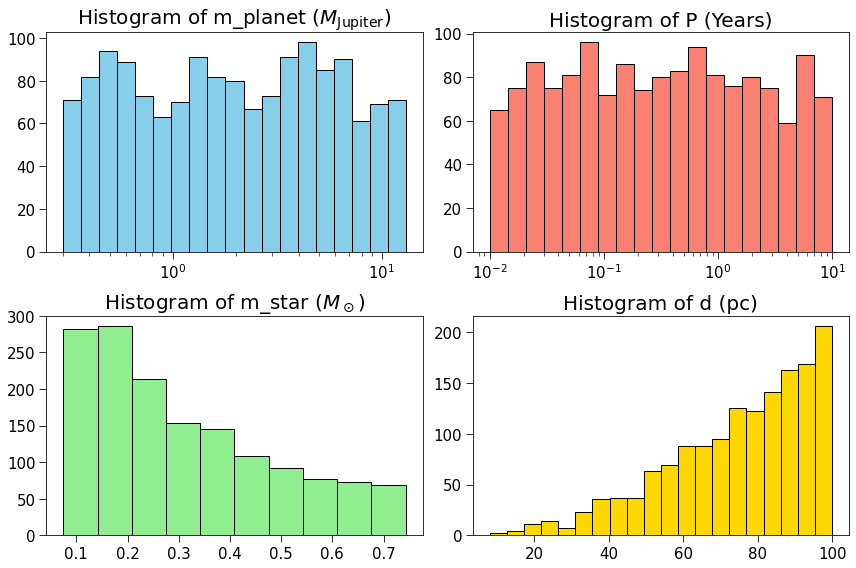

In [24]:
# Create a 2x2 figure of histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram for m_planet
axs[0, 0].hist(m_planet, bins=np.logspace(np.log10(0.3), np.log10(13),20), color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of m_planet ($M_{\mathrm{Jupiter}}$)', fontsize=big_text)
axs[0, 0].set_xscale('log')

# Plot histogram for P
p1 = np.log10(0.01)
p2 = np.log10(10)
axs[0, 1].hist(P, bins=np.logspace(p1,p2,20), color='salmon', edgecolor='black')
axs[0, 1].set_title('Histogram of P (Years)', fontsize=big_text)
axs[0, 1].set_xscale('log')

# Plot histogram for m_star
axs[1, 0].hist(m_star, bins=10, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Histogram of m_star ($M_\odot$)', fontsize=big_text)

# Plot histogram for d
axs[1, 1].hist(d, bins=20, color='gold', edgecolor='black')
axs[1, 1].set_title('Histogram of d (pc)', fontsize=big_text)


ax = axs[0, 0]
ax.tick_params(labelsize=small_text, which='major', length=7)
ax.tick_params(which='minor', length=4)
ax = axs[0, 1]
ax.tick_params(labelsize=small_text, which='major', length=7)
ax.tick_params(which='minor', length=4)
ax = axs[1, 0]
ax.tick_params(labelsize=small_text, which='major', length=7)
ax.tick_params(which='minor', length=4)
ax = axs[1, 1]
ax.tick_params(labelsize=small_text, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Plotting 

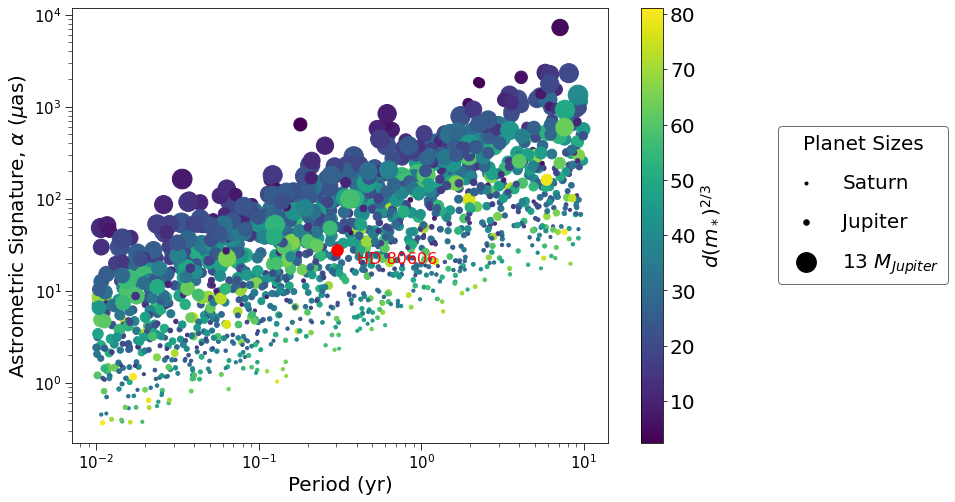

In [25]:
marker_scale = 30

# Create a larger figure and axis with logarithmic scales
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_xscale('log')
ax.set_yscale('log')

# Plot the points with size directly proportional to mass and use a single color
cbar  = d*m_star**(2/3)

data1 = ax.scatter(P, alpha, c=cbar, s=m_planet*marker_scale, cmap='viridis') # 
data = ax.scatter(HD80606_period, HD80606_alpha, c='red', s=HD80606_mplanet*marker_scale)

# Set labels and title'
ax.set_xlabel('Period (yr)', fontsize=big_text)
ax.set_ylabel('Astrometric Signature, $\\alpha$ ($\\mu$as)', fontsize=big_text)

# Adding ticks to axes
ax.tick_params(labelsize=small_text, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Disable scientific notation for axis labels
# ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))

# Create a color bar
cbar = plt.colorbar(data1, ax=ax)
cbar.set_label('$d (m_*)^{2/3}$', fontsize=big_text)
cbar.ax.tick_params(labelsize=big_text)

# Add legend for different m_planet values
legend_labels = ['Saturn', 'Jupiter', '13 $M_{Jupiter}$']
legend_sizes  = [0.299409946, 1, 13]

for label, size in zip(legend_labels, legend_sizes):
    ax.scatter([], [], c='black', s=size*marker_scale, label=label)

# Display the legend
legend_title = 'Planet Sizes'
legend = ax.legend(scatterpoints=1, frameon=True, labelspacing=1, 
                   title=legend_title, title_fontsize=big_text, 
                   loc='upper left', bbox_to_anchor=(1.3, 0.75), fontsize=big_text)

legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

ax.text(0.4, 20, 'HD 80606', fontsize=16, color='red')

plt.show()